# *IPR | Graphics - Exercise* : Geometry

Student name: *[Todo]* <br>
Student ID: *[Todo]* <br>

This is the handout and the exercise sheet for the IPR Graphics Exercise. <br>
You have to solve 3 tasks, summing to 12 points, in this exercise. <br>

In [7]:
# Load the IPR-library first, so we can import it with import ipr
!curl "https://raw.githubusercontent.com/IPR-WS2021/public-test/main/ipr.py" --output "ipr.py" 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5235  100  5235    0     0   138k      0 --:--:-- --:--:-- --:--:--  138k


## Simple Triangle Geometry

A triangle is a polygon with three sides and three vertices. 
Vertices are lists of coordinates with a length of 3 (x,y,z).
Note, that we ignore the z-coordinate for now.
The triangle `face` is a list of three vertices, thus a list of lists.

We can `import ipr` to get access to the `draw_polygon` function for debugging. 
Make sure that this Jupyter-notebook file (`.ipynb`) is in the same directory as the `ipr.py` file!

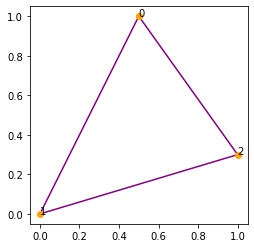

In [8]:
import ipr # for draw_polygon (drawing in 2D and debugging)

# 3 vertices:
v0 = [0.5, 1.0, 0.0]
v1 = [0.0, 0.0, 0.0]
v2 = [1.0, 0.3, 0.0]

face = [v0,v1,v2] # a triangle

ipr.draw_polygon(face)

## A Quad Geometry

A quad is a polygon with 4 sides and vertices. 
Similar to a triangle (above).

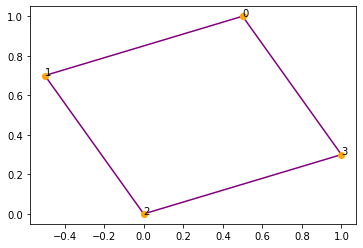

In [9]:
# a quad 
v0 = [0.5, 1.0, 0.0]
v1 = [0.0, 0.0, 0.0]
v2 = [1.0, 0.3, 0.0]
v3 = [-.5, 0.7, 0.0]

# stores 4 vertices:
quad = [v0,v3,v1,v2]

ipr.draw_polygon(quad) # debugging

## A Quad with 2 Triangles

Quads have some advantages for modeling (e.g., subdivision), but can lead to problems for rendering (e.g., if they are not planar).
Thus, it is often better to use triangles. Triangles are always planar and are mathematically simpler (e.g., for interpolation).


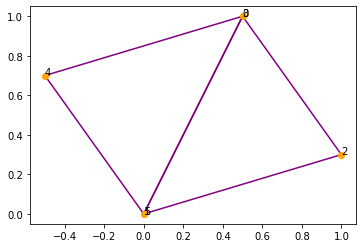

In [10]:
v0 = [0.5, 1.0, 0.0]
v1 = [0.0, 0.0, 0.0]
v2 = [1.0, 0.3, 0.0]
v3 = [-.5, 0.7, 0.0]

# stores 6 vertices:
triangles = [   v0,v1,v2,  # triangle 1
                v0,v3,v1 ] # triangle 2
 
ipr.draw_triangles(triangles) # debugging

## A Quad of 2 Triangles with Indexing

In the example above some vertices are duplicated and redundant. This leads to additional storage and computation overhead.
We can use indexing to remove redundant vertices.

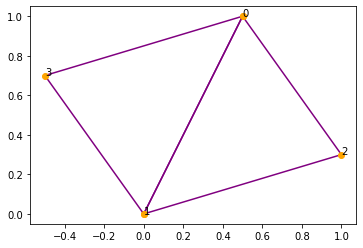

In [11]:
v0 = [0.5, 1.0, 0.0]
v1 = [0.0, 0.0, 0.0]
v2 = [1.0, 0.3, 0.0]
v3 = [-.5, 0.7, 0.0]

# store 4 vertices:
vertices = [v0,v1,v2,v3]
indices  = [0,1,2,  # triangle 1
            0,3,1]  # triangle 2

ipr.draw_triangles(vertices,indices) # debugging

## OBJ Polygon Outline Writer

A function to write an OBJ file with a single polygon outline. The input are the vertices of the polygon and the name of the file.
Vertices are given as a list in the order of appearance. Furthermore, the function ensures that the last and the first vertex are connected (closing the polygon).
Vertices in the OBJ file start with a `v` at the beginning of the line. Multiple vertices span over multiple lines, each beginning with a `v`.
The file contains a single line definition starting with the letter `l` and the subsequent indices of the vertices. 
Note that indices in OBJ files start at 1.

In [12]:
def write_obj_line_file(vertices, obj_file_name, print_obj=True):
    """Write a polygon as OBJ line file.

    The polygon can have varying numbers of vertices (e.g., triangle, quad, ...).
    Only an outline is stored in the OBJ file. 
    The file can be imported into Blender, Maya, or any other 3D modeling software.

    Args:
        vertices (list): a list of vertices (3D coordinates)
        obj_file_name (str): file name of the OBJ file
        print_obj (bool): if True, prints the OBJ file to the console. Defaults to True.
    """
    indices = list(range(1,len(vertices)+1)) # indices start at 1
    indices.append(1) # close the polygon by connecting the last with the first vertex

    with open(obj_file_name,'w') as f:
        f.write("# List of vertices, with (x y z [w=1]) coordinates.\n") # comment on top of vertex list
        for v in vertices:
            f.write(f"v {v[0]} {v[1]} {v[2]}\n") # write vertex

        # line
        f.write("# Line element (indices to vertices)\n") # comment for line
        f.write("l " + " ".join(map(str,indices)) + "\n")

    # Debug output of the written file:
    if print_obj:
        with open(obj_file_name) as f:
            contents = f.read()
            print(contents)


write_obj_line_file(quad, 'quad_outline.obj')

# List of vertices, with (x y z [w=1]) coordinates.
v 0.5 1.0 0.0
v -0.5 0.7 0.0
v 0.0 0.0 0.0
v 1.0 0.3 0.0
# Line element (indices to vertices)
l 1 2 3 4 1



## _Task 01:_ OBJ Triangle Writer [4 Points]

Implement a function to write an OBJ file with indexed triangles. The function parameters are the vertices of the polygon as a list, the indices for the triangles as a list, and the name of the file as a string.

A vertex in an OBJ file start with a `v` at the beginning of the line.  
A face (triangle) starts with an `f`. Make new line for every vertex and face.
Note that indices in OBJ files start at 1.

In [13]:
def write_obj_file(vertices, indices, obj_file_name, print_obj=True):
    """Writes a mesh as OBJ file (outline and fill)

    Args:
        vertices (list): a list of vertices (3D coordinates)
        indices (list): a list of indices to the vertices. Indices start at 0 and are incremented by 1 before writting to the OBJ file.
        obj_file_name (str): file name of the OBJ file
    """
    with open(obj_file_name,'w') as f:
        f.write("# List of vertices, with (x y z [w=1]) coordinates.\n") # comment on top of vertex list
        # Todo: write vertices

        f.write("# Polygonal face element (3 indices for a triangle) \n") # comment for face
        # Todo: write faces (make sure indices start at 1!)


    # Debug output of the written file:
    if print_obj:
        with open(obj_file_name) as f:
            contents = f.read()
            print(contents)

write_obj_file(vertices,indices,"quad.obj")

# List of vertices, with (x y z [w=1]) coordinates.
# Polygonal face element (3 indices for a triangle) 



## Circle Geometry

Create a circle with a given radius and number of vertices. 
Based on the number of vertices `num_vertices`, an angle `alpha` is computed and on every angle segment on the circle, a vertex is added. 
Thus, creating counter-clockwise ordered `num_vertices` vertices of a circle.
The circle is centered at the origin and extends +/- radius on the x and y axis. 

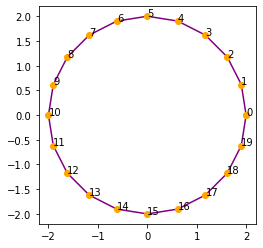

# List of vertices, with (x y z [w=1]) coordinates.
v 2.0 0.0 0
v 1.902113032590307 0.6180339887498948 0
v 1.618033988749895 1.1755705045849463 0
v 1.1755705045849463 1.618033988749895 0
v 0.6180339887498949 1.902113032590307 0
v 1.2246467991473532e-16 2.0 0
v -0.6180339887498947 1.9021130325903073 0
v -1.175570504584946 1.618033988749895 0
v -1.6180339887498947 1.1755705045849465 0
v -1.902113032590307 0.618033988749895 0
v -2.0 2.4492935982947064e-16 0
v -1.9021130325903073 -0.6180339887498946 0
v -1.6180339887498951 -1.175570504584946 0
v -1.1755705045849465 -1.6180339887498947 0
v -0.6180339887498951 -1.902113032590307 0
v -3.6739403974420594e-16 -2.0 0
v 0.6180339887498945 -1.9021130325903073 0
v 1.1755705045849458 -1.6180339887498951 0
v 1.6180339887498947 -1.1755705045849467 0
v 1.902113032590307 -0.6180339887498952 0
# Line element (indices to vertices)
l 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 1



In [14]:
import math # for cos and sin functions

radius = 2
num_vertices = 20
alpha = 2*math.pi/num_vertices

circle = []
for i in range(num_vertices):
    x,y = math.cos(alpha*i), math.sin(alpha*i)
    circle.append([x*radius,y*radius,0])

ipr.draw_polygon(circle)

write_obj_line_file(circle, 'circle_outline.obj')

## _Task 02_: Star Outline [4 Points]

Implement the `create_star` function that creates a star with a defined number of points/peaks. 
Use the circle geometry as basis and use two radii to define the offset of the points (vertices at peaks and non-peaks).
Create counter-clockwise ordered vertices of the star.
The star is centered at the origin and extends +/- radius2 on the x and y axis. 

The number of points `num_peaks` for your star should be based on your birthday. Sum the digits of the day and month of your birthday. For example, if your birthday is 13.04. you should create a star with 1+3+4 = 10 points/peaks.
Make sure, however, that the star drawing is correct for other numbers of points. If the sum is less than 5 use an arbitrary number!

Write the vertices and the outline of the star to an OBJ file and verify that the file is valid and correct by loading it in Blender/Maya/etc.
Hand the OBJ in.

**Bonus:** [1 Extra-Point] make sure that a line connecting two peaks passes through the vertices on the inner circle (see slides for a visual picture). Explain the equation on a sheet of paper or in Markdown (in this file) and hand it in.

In [15]:
# a star polygon
import math

def create_star(num_peaks, r1, r2) -> list:
    """Creates a star polygon with num_peaks peaks/points.

    Args:
        num_peaks (int): number of peaks in the star
        r1 (float): radius of the inner circle
        r2 (float): radius of the outer circle

    Returns:
        list: a list of vertices (3D coordinates)
    """
    vertices = []
    # Todo: create a star polygon with num_peaks peaks/points. Use the circle (from above) as basis.
    return vertices

r1 = 1 # inner radius
num_peaks = 5 # the digits of the day and month of your birthday summed up
r2 = 2 # outer radius [optional Bonus here!]

star = create_star(num_peaks, r1, r2)

ipr.draw_polygon(star)

write_obj_line_file(star, 'star_outline.obj')

# List of vertices, with (x y z [w=1]) coordinates.
# Line element (indices to vertices)
l 1



## _Task 03_: Star Mesh [4 Points]

Reuse the vertices of the `create_star` function from the previous task and create a filled star mesh with triangles. 

Make sure that the front of the star is only made of counter-clockwise triangles. 
The triangles are defined by the indices of the vertices.
Hint: you maybe need to add an additional vertex to close the inside of the star (inside the inner circle of radius `r1`).
Make sure that triangles do not overlap, this causes problems for rendering.

Write the vertices and indices of the star to an OBJ file and verify that the file is valid and correct by loading it in Blender/Maya/etc.
Hand the OBJ in. Ensure that the function is correct, by varying the number of points and the radius.

**Bonus:** [1 Extra-Point] Make the star 3D and not flat. For example, extrude the star mesh to create an object with depth (z!=0). For the extruded sides, you can ignore the winding-order (clockwise or counter-clockwise).

In [16]:

def create_star_mesh(num_peaks, r1, r2):    
    """Creates a star mesh (triangles) with num_peaks peaks/points.

    Args:
        num_peaks (int): number of points in the star
        r1 (float): radius of the inner circle
        r2 (float): radius of the outer circle

    Returns:
        list: a list of vertices (3D coordinates)
        list: a list of indices to the vertices. Indices start at 0 and are incremented by 1 before writting to the OBJ file.
    """
    vertices = create_star(num_peaks, r1, r2)
    indices = list(range(len(vertices)))

    # Todo: create a star mesh with vertices and triangle indices

    return (vertices, indices)

vertices, indices = create_star_mesh(num_peaks, r1, r2)

ipr.draw_triangles(vertices,indices)
write_obj_file(vertices,indices, 'star.obj')

# List of vertices, with (x y z [w=1]) coordinates.
# Polygonal face element (3 indices for a triangle) 



### Some Notes:
- You can delete cells of this notebook that are not related to the tasks. <br>
- Ensure that you added your name and matriculation number to the top of the notebook.